![text from document](https://dojq4kt8ws9iq.cloudfront.net/new-style-img/search-document-attachment.svg)

OCR extract text from pdf
----------------------------

The `pytesseract` library can be used to extract text from an image. It use "OCR" for "Optical Character Recognition" to associate super-pixels in a image to letters in a specific language. 

## Tesseract

Tesseract is an open source [text recognition (OCR)](https://en.wikipedia.org/wiki/Optical_character_recognition) Engine. The Window Installation of `Tesseract` is available at the following github page [Tesseract_exe](https://github.com/UB-Mannheim/tesseract/wiki). 

<ul>
    <li> You can download the last version of the software and double click on the executable file (<strong>.exe</strong> extension).</li> 
    <li> Then you must add the <i>Tesseract</i> executable path in you environment system. If you installed <i>for all users</i> then you will find the executable file at "C:\Program Files\Tesseract-OCR".</li>
    <li> See the following instructions to add a path to your operating system <a href"https://www.java.com/en/download/help/path.html">Environment_variable</a> or see bellow for the more accurate method.
</ul>


We want to extract image taken from a `pdf` (Portable Document Format) file. A `pdf` is a versatile file format created by Adobe (that can you check here [Adobe](https://www.adobe.com/fr/)). It is viewable on any kind of device and by any one who want it. For our project the main text is inside a pdf file and the [API](https://en.wikipedia.org/wiki/API) version of `Tesseract` can be used to recreate a textual version of the pdf screen shots.  

We will make some tests in order to handle perfectly the `pytesseract` library which is the API version of `Tesseract` available with python.

## First step: Make a noisy image be clear

Let us import the `Tesseract` library and also the `PIL`. The latter will help us to process the noisy image in order to get more valuable results with `Tesseract`.

In [2]:
!pip install pytesseract --quiet


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pytesseract

from PIL import Image

Let us try to obtain a result with the noisy version of the image.

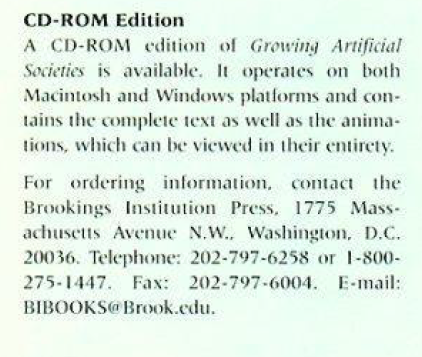

In [2]:
img_file = "data/image1.png"

img = Image.open(img_file)

img

In [7]:
try:
    
    ocr_result = pytesseract.image_to_string(img)

except Exception:
    
    # if the path is already seen from the system let us add the executable
    # it directly bellow
    pytesseract.pytesseract.tesseract_cmd = "tesseract.exe"
    
    ocr_result = pytesseract.image_to_string(img)
    
print(ocr_result)

Societies is available. It operates on both
Macintosh and Windows platforms and con-
1s the complete text as well as the anima-
tions, which can be viewed in their entirety.

For ordering information, contact’ the
Brookings Institution Press, 1775 Mass-
achusetts. Avenue N.W., Washington, D.C.
20036. Telephone: 202-797-6258 or 1-800-
275-1447, Fax: 202-797-6004. E-mail:
BIBOOKS@Brook.edu.




It extracted greatly the text but let us try with a more noisy image.

...

## Second step: Extract page of a pdf

Let us use the `pdf2image` library which extract the pages of a pdf file and transform them to images.

In [9]:
!pip install pdf2image --quiet


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


We a function which take as argument the pdf directory path and for all extracted pages convert them to images in a new specified directory.

In [17]:
# %%writefile pdf-extract/pdf_extract/conversion/pdf_to_image.py
import os
import glob
import pdf2image as p2i

def pdf_to_image(pdf_directory: str, images_directory: str, img_extension: str = "jpg", **kwargs):
    """Extract pages from a pdf file as images

    Args:
        pdf_directory (str): The directory where the pdf file is stored
        images_directory (str): The directory where will be saved the images
        img_extension (str, optional): The extension of the images. Defaults to "jpg".

    Raises:
        ValueError: Extension can only be jpg or png
        OSError: The pdf directory must exists
        OSError: The images' directory must exists before the extraction
        OSError: The new directory of a particular pdf to store images must not exists before extraction
    """
    
    # let us verify if the extension of the images are valid
    if img_extension == 'jpg':
        
        format = "JPEG"
    
    elif img_extension == 'png':
        
        format = "PNG"
    
    else:
        
        raise ValueError("You can choose only between jpg or png extensions")
    
    # let us verify if the directories exist
    if not os.path.exists(pdf_directory) and os.path.isdir(pdf_directory):
        
        raise OSError("You must provide a existing pdf directory !")
    
    if not os.path.exists(images_directory) and os.path.isdir(images_directory):
        
        raise OSError("You must provide an existing images' directory !")
    
    # let us recuperate the pages of each pdf in the directory and 
    # place their converted versions in a new directory with the same name
    # as that of the pdf file
    pdfs = glob.glob(os.path.join(pdf_directory, "*.pdf"))
    
    for pdf in pdfs:
        
        # recuperate the name of the pdf file
        name = os.path.splitext(os.path.basename(pdf))[0]
        
        # extract the pages
        pages = p2i.convert_from_path(pdf, **kwargs)
        
        # let us create a new directory for the current pdf file
        new_current_path = os.path.join(images_directory, name)
        
        if not os.path.exists(new_current_path):
            
            os.makedirs(new_current_path)
            
        else:
            
            raise OSError(f"The directory {new_current_path} already exist and cannot be overwrited !")

        # let us save the image in new directory
        for i, page in enumerate(pages):
            
            page.save(os.path.join(new_current_path, f"{i}.{img_extension}"), format=format)
        
        print(f"The found pages in the pdf file {name} were successfully extracted !")
    
    
    

We want to save the pages in the following book [Wollof_grammaire](data\diagne_grammaire_wolof.pdf).

In [14]:
pdf_to_image("data", "data/extractions/images/")

## Extract text from image (our goal)

The next step is to transform the images extracted in a directory to a text document. We can do it for different directories (in that case two directories).

Before that let's create a function for extracting the text from only one image and test it.

In [12]:
import pytesseract

from PIL import Image

def image_to_text(img_path: str, executable_path: str = r"C:\Program Files\Tesseract-OCR\tesseract.exe", language: str = "fra"):
    
    img = Image.open(img_path)
    
    try:
    
        result = pytesseract.image_to_string(img, lang=language)

    except Exception:
        
        # if the path is already seen from the system let us add the executable
        # it directly bellow
        pytesseract.pytesseract.tesseract_cmd = executable_path
        
        result = pytesseract.image_to_string(img)
    
    return result



Let's try to extract the text from the following image [image_to_extract](data\extractions\images\diagne_grammaire_wolof\10.jpg).

In [28]:
image_to_text("data/extractions/images/diagne_grammaire_wolof/10.jpg")

"INTRODUCTION\n\nL'analyse qui fait l'objet de cet ouvrage porte sur le wolof\ncontemporain tel qu'il peut étre saisi dans son unité.\n\nLes perspectives qui sont choisies ne nient évidemment, ni\nn'excluent, l'existence de phénoménes de différenciation qui ont\naffecté ou continuent de peser sur l'évolution de cette langue devenue\naujourd'hui le moyen de communication de la grande majorité des\nhabitants du Sénégal.\n\nLe monde culturel défini par le wolof déborde le cadre d'une\nethnie. La langue a pris racine a partir de la région du L6f, ancienne\nprovince du Tekrour, puis du Walo. La fondation et l'expansion au\nXIV’ siécle, de l'empire du Diollof lui ont servi trés tot de support.\nElle a de ce fait regu des apports divers du cété du Pular et du Serer\ndont on la rapproche traditionnellement. Par rapport au Mandingue\nnon plus l'influence n'a pas été négligeable. La présence islamique\ntrés ancienne y a laissé des traces profondes. Les réalités véhiculées\npar l'essort des cultu

Some words are not correctly extracted and it can be problematic when comparing two words in different language. The quality of the traduction can be degraded.

But for the moment let's create the function that we need and after that try other methods of extraction and compare with our current method.

In [13]:
import os
import glob

def images_to_texts(images_directory: str, text_directory: str, img_extension: str = 'jpg', executable_path: str = r"C:\Program Files\Tesseract-OCR\tesseract.exe", language: str = "fra"):
    
    if not img_extension in ['jpg']:
        
        raise ValueError("You can choose only between jpg or png extensions")
    
    # let us verify if the directories exist
    if not os.path.exists(images_directory) and os.path.isdir(images_directory):
        
        raise OSError("You must provide a existing images' directory !")
    
    if not os.path.exists(text_directory) and os.path.isdir(text_directory):
        
        raise OSError("You must provide an existing text directory !")
    
    # let us recuperate the text that each image contains and place them in
    # their respective directories
    directories = glob.glob(os.path.join(images_directory, "*"))
    
    for img_dir in directories:
        
        # we must verify if the current path is that of a directory
        if os.path.isdir(img_dir):
                
            # recuperate the name of the directory file
            name = os.path.splitext(os.path.basename(img_dir))[0]
            
            # recuperate the images in the directory
            images = glob.glob(os.path.join(img_dir, f"*.{img_extension}"))
            
            # let us create a new directory for the current images' directory
            new_current_path = os.path.join(text_directory, name)
            
            if not os.path.exists(new_current_path):
                
                os.makedirs(new_current_path)
                
            else:
                
                raise OSError(f"The directory {new_current_path} already exist and cannot be overwrited !")

            # the text of each image can be extracted and stored into a text file
            for image in images:
                
                image_name = os.path.splitext(os.path.basename(image))[0]
                
                text = image_to_text(image, executable_path, language)
                
                # let's store the text into a text file
                with open(os.path.join(new_current_path, f"{image_name}.txt"), "w") as f:
                    
                    f.write(text)
            
            print(f"The found images in the directory {name} were successfully extracted !")

    

Let's extract the text from the directories that we created above.

In [15]:
images_to_texts("data/extractions/images/", "data/extractions/texts/", language="afr")

The found images in the directory Joshua M. Epstein, Robert L. Axtell - Growing Artificial Societies_ Social Science from the Bottom Up (Complex Adaptive Systems) (1996) - libgen were successfully extracted !
The found images in the directory diagne_grammaire_wolof were successfully extracted !


--------------------------------------

In [29]:
!pip install pdfquery

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached chardet-5.1.0-py3-none-any.whl (199 kB)
     ---------------------------------------- 5.6/5.6 MB 344.8 kB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 267.4 kB/s eta 0:00:00
  Created wheel for pdfquery: filename=pdfquery-0.4.3-py3-none-any.whl size=16783 sha256=397cc9e03adfa8c863c878572b5a88571fba4dca12eedc6ed042660d3acf010e
  Stored in directory: c:\users\oumar kane\appdata\local\pip\cache\wheels\cd\a4\8e\0a60850f5ecf4ebd3d78f902b7ee8a4c714b4d4bebefcdb859
Successfully built pdfquery



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
from pdfquery import PDFQuery

pdf = PDFQuery('data\diagne_grammaire_wolof.pdf')
pdf.load()

# Use CSS-like selectors to locate the elements
text_elements = pdf.pq('LTTextLineHorizontal')

# Extract the text from the elements
text = [t.text for t in text_elements]

print(text)

c:\Users\Oumar Kane\AppData\Local\pypoetry\Cache\virtualenvs\pytorch1-HleOW5am-py3.10\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.22) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


['', '', '', '', '', '', '', '', '', '', '', '25 bis, rue des Écoles ', 'PARIS Ve ', '', '', '', 'Béppub lakk rafet na ', 'Buy tudd ci jaam ngor la ', 'Buy leeral ci nit xel ma ', '', 'Toute langue est belle ', "qui sait de l'homme ", 'dire les vertus et la science. ', '', '', '', '', 'Les perspectives qui sont choisies ne nient évidemment, ni ', "n'excluent, l'existence de phénomènes de différenciation qui ont ", "affecté ou continuent de peser sur l'évolution de cette langue devenue ", "aujourd'hui le moyen de communication de la grande majorité des ", 'habitants du Sénégal. ', "Le monde culturel défini par le wolof déborde le cadre d'une ", 'ethnie. La langue a pris racine à partir de la région du Lôf, ancienne ', "province du Tekrour, puis du Wâlo. La fondation et l'expansion au ", "XIVe siècle, de l'empire du Diollof lui ont servi très tôt de support. ", 'Elle a de ce fait reçu des apports divers du côté du Pular et du Serer ', 'dont on la rapproche traditionnellement. Par rapport

In [31]:
!pip install PyPDF2
!pip install textract

     ------------------------------------ 232.6/232.6 kB 130.6 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ------------------------------------ 103.3/103.3 kB 372.0 kB/s eta 0:00:00
     ------------------------------------ 106.9/106.9 kB 343.9 kB/s eta 0:00:00
  Using cached SpeechRecognition-3.8.1-py2.py3-none-any.whl (32.8 MB)
     ------------------------------------ 133.4/133.4 kB 438.1 kB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 246.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 10.1/10.1 MB 564.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 69.0/69.0 kB 625.3 kB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 835.3 kB/s eta 0:00:00
  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl (29 kB)
     ------------------------------------ 128.5/128.5 kB 839.0 kB/s eta 0:00:00
  Preparing metadat


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import PyPDF2 
import textract
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [4]:

filename = 'data\diagne_grammaire_wolof.pdf' 
#open allows you to read the file.
pdfFileObj = open(filename,'rb')
#The pdfReader variable is a readable object that will be parsed.
pdfReader = PyPDF2.PdfReader(pdfFileObj)
#Discerning the number of pages will allow us to parse through all the pages.
num_pages = len(pdfReader.pages)
count = 0
text = ""
#The while loop will read each page.
while count < num_pages:
    pageObj = pdfReader.pages[count]
    count +=1
    with open(f"data/extractions/texts/diagne_gram/page{count}", "w") as f:
       
       f.write(pageObj.extract_text())
    text += pageObj.extract_text()
#This if statement exists to check if the above library returned words. It's done because PyPDF2 cannot read scanned files.
if text != "":
   text = text
#If the above returns as False, we run the OCR library textract to #convert scanned/image based PDF files into text.
else:
   text = textract.process(filename, method='tesseract', language='fra')

In [3]:
text

"PATHÉ DIAGNE\nGRAMMAIRE\nDE\nWOLOF MODERNE\nPRÉSENCE AFRICAINEGRAMMAIRE\nDE WOLOF MODERNEPATHÉ DIAGNE\nGRAMMAIRE\nDE\nWOLOF MODERNE\n25 bis, rue des Écoles\nPARIS Ve©1971, Présence AfricaineEn mémoire à ma mère, \nRokhaya Tafsir Oumar Sall .Béppub lakk rafet na\nBuy tudd ci jaam ngor la Buy leeral ci nit xel ma\nSerifi M\nUUSA KA\nToute langue est belle\nqui sait de l'hommedire les vertus et la science.\n       M\nOUSSA KA.1 VOGT, Diffusion of langage . — Voir aussi : U.  WEINREITH  G. MOUNIN , Les problèmes\nthéoriques de la Traduction , A. MARTINET .INTRODUCTION\nL'analyse qui fait l'objet de cet ouvrage porte sur le wolof\ncontemporain tel qu'il peut être saisi dans son unité.\nLes perspectives qui sont choisies ne nient évidemment, ni\nn'excluent, l'existence de phénom ènes de différenciation qui ont\naffecté ou continuent de peser sur l'évolution de cette langue devenue\naujourd'hui le moyen de communicati on de la grande majorité des\nhabitants du Sénégal.\nLe monde culturel déf